# House Price Prediction (Simplified Version)

## Group members: Weijie Yi (Leader), Yifan Zhang, Yifei Zhang, Yutong Zhang

# Introduction 

Our project of House price prediction in Georgia state is to  use data science technology to translate a large amount of Zillow house data to meaningful insights. We use Zillow house data to train machine learning models that can help us to predict the Georgia house’s price. Our model will serve as a predictive model that help user to decide whether the sale price of a unlisted house is higher or lower than its actual sale price, which will provide a good comparison for them to decide whether they should invest or not. 

# Data Explanation 

The data for our project is provided in two files: GaCensus.xlsx and ForSaleData.xlsx.
+ ForSaleData.xlsx contains 32056 rows and 48 columns.
+ GaCensus.xlsx contains 949 rows 27 columns.
+ we merge these two dataset together by the common feature of City.
+ We also split our dataset in to training data set and testing dataset,which contains 30% of the total dataset.
+ Each row represents a house in Georgia state,each column is a feature, either unique to the house.
+ These data set contains both numerical features and categorical features,and we transfer categorical features in to numerical features. 

Feature Introduction:

ForSaleData:
+ 5 categories
+ house pric:'city','ParcelId’, 'StreetAddress’, 'Zipcode’, 'Latitude','Longitude’
+ Location:'Price','PriceChange','Zestimate', 'RentZestimate’,'Zpid'
+ homesiatution:'Bathrooms','Bedrooms',''LivingArea','LotSize','Basement','Appliances','Cooling','Heating','Flooring','ExteriorFeatures','RoofType','Utilities','YearBuilt'
+ school information:'PrimarySchoolDistance', 'PrimarySchoolName','PrimarySchoolRating','MiddleSchoolDistance','MiddleSchoolName','MiddleSchoolRating','HighSchoolDistance', 'HighSchoolName','HighSchoolRating'
+ website information:'last_upd_dt','hoa','Url','OnMarketDate','last_upd_dt'


GaCensus:
+ 5 categories
+ populaiton:'FemalePopulation', 'HawaiianPopulation','HispanicPopulation','AmericanIndianPopulation','AsianPopulation','BlackPopulation','WhitePopulation','FemalePopulation','MalePopulation'
+ household:'IncomePerHousehold','Households','PersonsPerHousehold','AverageHouseValue'
+ age:'MaleMedianAge','FemaleMedianAge'
+ employment:'BusinessMailboxes','NumberofBusinesses', 'NumberofEmployees'，‘AnnualPayroll’
+ other:'BusinessMailboxes','ResidentialMailboxes','City', 'CountyFIPS','Latitude', 'Longitude'


# Goal 

Our goal is to predic the house price of Georgia state as precise as possible. we collected the data of each house,and each house has own unique information, and we also clloect the data of Population profile in Georgia state.

# Metric 

we want to build  machine learning model that can predict the house price of Georgia state as precise as possible.Our predictions will be assessed by the following metric.


+ MAE:Mean Absolute Error 
+ MSE:Mean Squared Error
+ RMSE:Root Mean Square Error
+ MAPE: Mean Absolute Percentage Error
+ MPE:Mean Percentage Error
+ R^2:R-squared

# Model 

Since the variables we predicted were continuous variables, we first used the linear regression model, and then used the lasso linear regression model to avoid overfitting.In order to get a better model, we use In order to get a better model, we use  machine learning model of random forest, XGboost,LGBM.On the base of these underlying machine learning models we build our Ensemble Learning model to further improve the performance of models.
+ Simple Model: linear regression, Lasso
+ Complex Model:random forest, XGboost,LGBM
+ Ensemble Learning

### Default Model 

We first tune our dataset on the default machine learning modle, which serve as the benchmark to further impromve our model and compare the result of our tunning models.

### Grid search  & RandomSearch

we use gridsearch and RandomSearch to tune the best combination of hyperparameter for each model by achieving the highest average metric score on each validation data set.

# PART ONE

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
color = sns.color_palette()
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import boxcox
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
import warnings
warnings.filterwarnings('ignore')

# 1. Collecting Data

In [240]:
sale_data_df = pd.read_excel('ForSaleData.xlsx')
gagensus_df = pd.read_excel('GaCensus.xlsx')

# 2. Data Browsing

In [241]:
sale_data_df.head()
gagensus_df.head()

,Zpid,ParcelId,HomeStatus,HomeType,StreetAddress,City,State,Zipcode,Latitude,Longitude,...,PrimarySchoolRating,MiddleSchoolDistance,MiddleSchoolName,MiddleSchoolRating,HighSchoolDistance,HighSchoolName,HighSchoolRating,hoa,OnMarketDate,last_upd_dt
0,90171327,6194384,FOR_SALE,CONDO,1809 Brookside Lay Cir,Norcross,GA,30093,33.904044,-84.221225,...,5.0,5.7,Louise Radloff Middle School,5.0,4.7,Meadowcreek High School,3.0,0,NaT,NaT
1,14770166,6176A070,FOR_SALE,SINGLE_FAMILY,997 Carla Pl,Norcross,GA,30093,33.921892,-84.131309,...,4.0,1.2,Berkmar Middle School,8.0,1.4,Berkmar High School,4.0,0,NaT,NaT
2,14773317,6187374,FOR_SALE,SINGLE_FAMILY,1371 Kings Ridge Dr,Norcross,GA,30093,33.911711,-84.175728,...,4.0,3.1,Louise Radloff Middle School,5.0,1.8,Meadowcreek High School,3.0,0,NaT,NaT
3,124173626,6169331,FOR_SALE,TOWNHOUSE,6302 Story Cir,Norcross,GA,30093,33.892507,-84.198051,...,5.0,3.4,Lilburn Middle School,5.0,3.6,Meadowcreek High School,3.0,0,NaT,NaT
4,14774647,6190064,FOR_SALE,SINGLE_FAMILY,1227 Gale Dr,Norcross,GA,30093,33.894653,-84.202902,...,5.0,3.7,Lilburn Middle School,5.0,3.8,Meadowcreek High School,3.0,0,NaT,NaT


,ZipCode,City,Latitude,Longitude,CountyFIPS,BusinessMailboxes,ResidentialMailboxes,NumberofBusinesses,NumberofEmployees,Population2010,...,AnnualPayroll,AverageHouseValue,IncomePerHousehold,Households,PersonsPerHousehold,FemaleMedianAge,FemalePopulation,MaleMedianAge,MalePopulation,MedianAge
0,30327,Atlanta,33.864887,-84.423887,121,424,10338,839,13418,22208,...,919794000,879600,148480,9217,2.40,45.70 years,11484,44.10 years,10724,44.90 years
1,30573,Tallulah Falls,34.736100,-83.391500,241,0,0,12,216,163,...,7488000,299300,132250,69,2.36,44.80 years,77,46.50 years,86,45.80 years
2,30005,Alpharetta,34.090544,-84.218282,121,1567,13450,1794,41291,34442,...,3465474000,395200,127340,11665,2.95,36.50 years,17516,35.60 years,16926,36.10 years
3,30075,Roswell,34.056136,-84.379465,121,1476,21419,1829,15829,52573,...,610556000,364300,109786,19610,2.66,42.50 years,26851,40.40 years,25722,41.50 years
4,30068,Marietta,33.972174,-84.441108,67,684,12886,1061,8309,31595,...,307618000,376500,108105,12054,2.62,44.50 years,16138,42.10 years,15457,43.40 years


# 3. Cleaning Data for Each Form to Be Ready for Merging

Step1: We need to find column names appear in both forms.

In [242]:
sale_name = list(sale_data_df.columns)
sale_name_lower = [sale.lower() for sale in sale_name]
gagensus_name = list(gagensus_df.columns)
gagensus_name_lower = [ga.lower() for ga in gagensus_name]
common = [x for x in sale_name_lower if x in gagensus_name_lower]
common

['city', 'zipcode', 'latitude', 'longitude']

Step2: Merging key options include 'city', 'zipcode', 'latitude' and 'longitude'. We could foresee that 'zipcode', 'latitude' and 'longitude' are more specific than 'city'. If we choose one of those three as key, it is possible that there are lots of missing values we need to fill. However, if we choose 'city' as the key, that problem could be avoided. Another thing to support our choice is that the same city always has similar attributes. Thus, for gagensus_df, we need to groupby city. For sale_data_df, we could remain most of features inside until we merge two forms. 

## (1) Gagensus Form

Gagensus form is about city information in Georgia State.

In [13]:
#gagensus_df.info()

### a. Drop meaningless value

Value in 'ZipCode' and 'CountyFIPS' are artificially regulated. They are not naturally attribute for city. So we drop them.

In [244]:
g_a = gagensus_df.drop(['ZipCode','CountyFIPS'], axis = 1)

### b. Convert object into numerical value

From data info we find 4 features in object type. To better take advantage of original dataset, we decide to convert possible object featues into numerical features. They are 'FemaleMedianAge', 'MaleMedianAge' and 'MedianAge'.

In [245]:
g_a['FemaleMedianAge'] = g_a['FemaleMedianAge'].str.strip(' years').astype(float)
g_a['MaleMedianAge'] = g_a['MaleMedianAge'].str.strip(' years').astype(float)
g_a['MedianAge'] = g_a['MedianAge'].str.strip(' years').astype(float)

### c. Compile features in same city

We find in orginal data form, some same city appears many times. In order to get an overview of the same city and merge them with the other form via key 'City', we decide to sum some of those features up.

In [246]:
g_b = g_a[['City', 'BusinessMailboxes', 'ResidentialMailboxes',
       'NumberofBusinesses', 'NumberofEmployees', 'Population2010',
       'CurrentPopulation', 'AmericanIndianPopulation', 'AsianPopulation',
       'BlackPopulation', 'HawaiianPopulation', 'HispanicPopulation',
       'WhitePopulation', 'AnnualPayroll', 'Households', 'FemalePopulation', 'MalePopulation']]
g_c = g_b.groupby('City').sum()

We find 'IncomePerHousehold' and 'PersonsPerHousehold' is the average value in different counties within the same city. So we cannot sum them up. In this case, we decide to take the weighted average for them in each city. Here are formulas: 

<center> IncomePerHousehold = $\sum_{i=1}^{n}{IncomePerHousehold_i}$*$Household_i$ / $\sum_{i=1}^{n}{Household_i}$ </center>

<center> PersonsPerHousehold = $\sum_{i=1}^{n}{PersonsPerHousehold_i}$*$Household_i$ / $\sum_{i=1}^{n}{Household_i}$ </center>

In [247]:
g_c['IncomePerHousehold'] = g_a.groupby('City').apply(
    lambda g_a: np.average(g_a['IncomePerHousehold'], weights = g_a['Households'])
    if g_a['Households'].any() >0 else 0)
g_c['PersonsPerHousehold'] = g_a.groupby('City').apply(
    lambda g_a: np.average(g_a['PersonsPerHousehold'], weights = g_a['Households']) 
    if g_a['Households'].any() >0 else 0)

For features 'AverageHouseValue', 'FemaleMedianAge', 'MaleMedianAge' and 'MedianAge', they are also average value. We cannot sum them up. Also there exist zero values. So a best way to compile them based on city is to calculate non-zero average for those features.

In [248]:
g_c['AverageHouseValue'] = g_a.groupby('City').apply(
    lambda g_a: np.array(g_a['AverageHouseValue'])[np.nonzero(np.array(g_a['AverageHouseValue']))].mean())
g_c['FemaleMedianAge'] = g_a.groupby('City').apply(
    lambda g_a: np.array(g_a['FemaleMedianAge'])[np.nonzero(np.array(g_a['FemaleMedianAge']))].mean())
g_c['MaleMedianAge'] = g_a.groupby('City').apply(
    lambda g_a: np.array(g_a['MaleMedianAge'])[np.nonzero(np.array(g_a['MaleMedianAge']))].mean())
g_c['MedianAge'] = g_a.groupby('City').apply(
    lambda g_a: np.array(g_a['MedianAge'])[np.nonzero(np.array(g_a['MedianAge']))].mean())

### d. Reset index

Since we process data based on groupby 'City'. The index right now is 'City'. We need to convert them into numerical range instead of 'City' for further convinience.

In [249]:
city_df = g_c.reset_index()

## (2) Sales data Form

sale_data_df is about each house information and sales data on Zillow.

In [14]:
#sale_data_df.info()

### Drop meaningless value

Step1: Value in 'Zpid','ParcelId' and 'Zipcode' are artificially regulated. They are not naturally attribute for city. So we drop them.

Step2: For other features 'HomeStatus','StreetAddress','Url','PrimarySchoolName','MiddleSchoolName','HighSchoolName', 'OnMarketDate' and 'last_upd_dt', they are all useless for price predicting. So we drop them.

Step3: We find there are many features about price, which is the y we want to predict. 'PriceChange' 'Zestimate', 'RentZestimate' are not that useful compared to actual 'Price' itself. So we drop them.

Step4: Since 'latitude', 'longitude' are also appears in gagensus form, we should only reserve one set of them.

In [251]:
s_a = sale_data_df.drop(columns=['Zpid','ParcelId','HomeStatus','StreetAddress',
                 'Zipcode','PriceChange', 'Zestimate', 'RentZestimate','Url','PrimarySchoolName',
                 'MiddleSchoolName','HighSchoolName','OnMarketDate','last_upd_dt','Latitude','Longitude'])

We know there may exist some mistakes when conducting web crawling. To make sure all house in this form are in GA state, we decide to check feature state. If there are houses in other state, we drop them. Then we drop 'State' feature.

In [252]:
s_a['State'].value_counts()

GA    32044
0         9
AL        1
LA        1
OH        1
Name: State, dtype: int64

In [253]:
s_a = s_a[s_a['State'].isin(['GA'])]
sales_df = s_a.drop(columns=['State'])

# 4. Merging Data 

In [254]:
df = sales_df.merge(city_df, on=['City'], how='inner') 

# 5. Cleaning Merged data

## (1) Drop rows and columns

Step1: Drop rows. Because y-'price' is what we want to predict. If its value is NaN, we cannot just fill them based on other house prices. It is not helpful for building high performance model. So we decide to drop rows which 'price' is zero.

In [255]:
df['Price'].value_counts()
print('Is there any missing values in Price Column?',df['Price'].isnull().any())

0         644
250000    137
399900    137
299900    136
349900    127
         ... 
425766      1
194343      1
814900      1
593720      1
339998      1
Name: Price, Length: 9741, dtype: int64

Is there any missing values in Price Column? False


In [256]:
df_1 = df.drop(index=list(np.where(df['Price']==0)[0]))

Step2: Drop columns. If there are so many missing values, we drop them directly.

Text(0.5, 1.0, 'Missing ratio in columns')

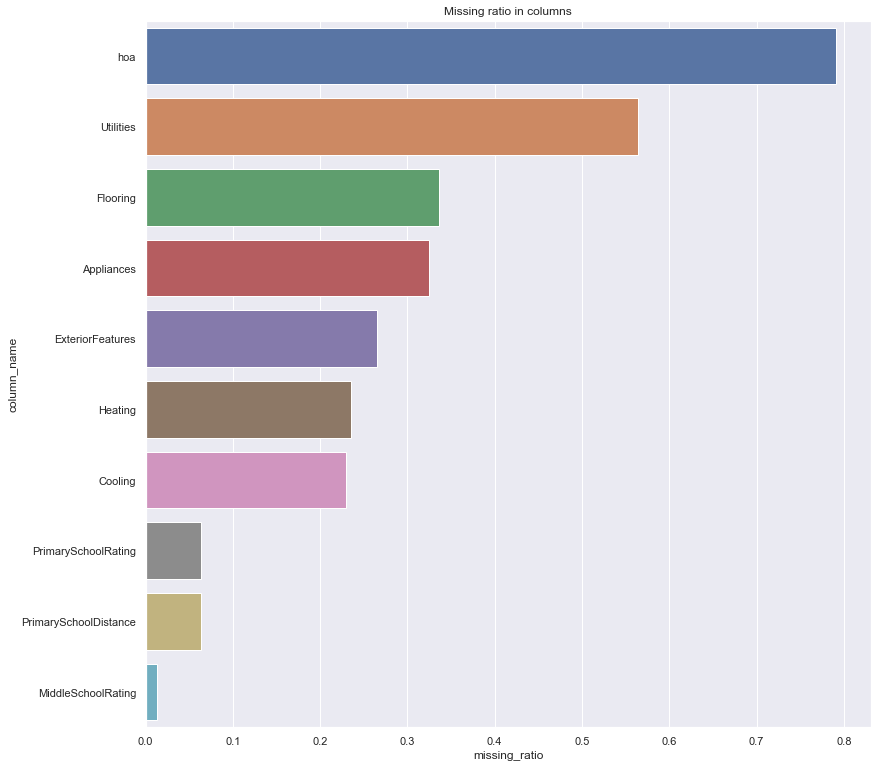

In [257]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df.shape[0]
missing_df = missing_df.sort_values(by='missing_count', ascending=False)
sns.set(rc={'figure.figsize':(13,13)})
sns.barplot(data=missing_df[0:10], x='missing_ratio', y='column_name').set_title('Missing ratio in columns')

We find missing values in 'hoa' and 'Utilities' are over 50%, so we drop them. Because if we fill missing values based on minority, it will have great bias.

In [258]:
df_1 = df_1.drop(columns = ['hoa', 'Utilities'])

## (2) Drop Outliers

We decide to drop values beyond 3 standard deviation in Price.

Text(0.5, 1.0, 'Boxplot for Outliers in Price')

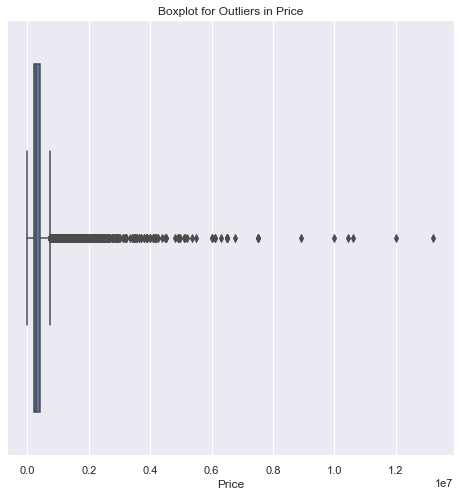

In [259]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(x = df_1['Price']).set_title('Boxplot for Outliers in Price')

In [260]:
price = np.array(df_1['Price'])
mean = np.mean(price,axis=0)
sd = np.std(price, axis=0)
price_1 = [x for x in price if (x > mean - 3 * sd)]
price_2 = [x for x in price_1 if (x < mean + 3 * sd)]
print('Ratio of outliers removed in Price is %.2f' % ((len(price)-len(price_2))/len(price)))

Ratio of outliers removed in Price is 0.01


In [261]:
df_2 = df_1[df_1['Price'].isin(list(price_2))]

## (3) Convert object into numerical value

In [262]:
df_3 = df_2.select_dtypes(include='object')
df_3.head()

,HomeType,City,Basement,Appliances,Cooling,Heating,Flooring,ExteriorFeatures,RoofType
0,CONDO,Norcross,0,dishwasher Electric Range,"Ceiling Fan S,Central Air",gas Forced Air Natural Gas,0,Wood,C o m p o s i t i o n
1,SINGLE_FAMILY,Norcross,0,Range / Oven Refrigerator,Central,Forced air,Carpet Laminate,Brick Wood,C o m p o s i t i o n
2,SINGLE_FAMILY,Norcross,"Finished, Walk-Out Access, Walk-Up Access",Dishwasher Range/Oven Refrigerator Other,Central Air Ceiling Fan(s),Other Central,Hardwood,Stone Wood,0
3,TOWNHOUSE,Norcross,0,"Dishwasher,Disposal,Electric Cooktop,Electric ...",Central Air,Central,"Carpet,Hardwood",Wood,C o m p o s i t i o n
4,SINGLE_FAMILY,Norcross,Crawl Space,Other,Central Air,"Forced Air,Natural Gas",Other,Brick Other,C o m p o s i t i o n


### a. Count 'Appliances'

Fo convenience, we drop rows containing missing values of 'Appliances'. Since 'Appliances' is combined by different types, we could count them to replace string type values.

In [263]:
df_3 = df_2.dropna(subset = ['Appliances'])
adf =df_3['Appliances']
adf.iloc[np.where(df_3['Appliances']==0)[0]]='0'
df_al_p1=[]
for i in range(0,len(adf)):
    if adf.iloc[i] != 0:
        df_al_p1.append([len(adf.iloc[i]),adf.iloc[i].encode('raw_unicode_escape'),adf.index[i]])
        df_al_pp1=[]
for i in range(0,len(df_al_p1)):
    df_al_pp1.append(df_al_p1[i][0])
for i in range(0,len(df_al_p1)):
    if df_al_p1[i][0]==max(df_al_pp1):
        print(df_al_p1[i])

[253, b'Dishwasher Range/Oven Refrigerator Disposal Double Oven Convection Oven Dryer Washer Central Vacuum Indoor Grill Ice Maker Gas Water Heater Cooktop - Separate Microwave - Built In Oven - Wall ENERGY STAR Qualified Appliances Stainless Steel Appliance(s)', 10454]


In [264]:
df_3['Appliances']=adf
df_dpnew=df_3 # utility :u
df_dpnew.index=range(0,len(df_3))
sdsds=[]
for i in range(0,len(df_dpnew)):
    sdsds.append(0)
    if 'Dishwasher' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Range/Oven' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Refrigerator' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Disposal' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Double Oven' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Convection Oven' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Dryer' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Washer' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Central Vacuum' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Indoor Grill' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Ice Maker' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Gas Wa' in df_dpnew['Appliances'][i]: #ter Heater
        sdsds[i]=sdsds[i]+1
    if 'Cooktop - Separate' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Microwave - Built In' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'ENERGY STAR Qualified Appliances,' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Stainless Steel Appliance(s)' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Oven - Wall' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'dishwasher' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Range / Oven' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Electric Ran' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Electric Cooktop' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1

In [265]:
df_3['Appliances']=sdsds

After filling missing value with average number, we count Appliance number again.

### b. Encode other features

Step1: Encode 'HomeType' and 'City' via label encoder.

In [266]:
df_3['HomeType'].value_counts()
df_3['City'].value_counts()

SINGLE_FAMILY    15540
TOWNHOUSE         2021
CONDO              988
LOT                508
MANUFACTURED        66
MULTI_FAMILY        48
APARTMENT            2
Name: HomeType, dtype: int64

Marietta         1688
Atlanta          1315
Alpharetta        793
Lawrenceville     778
Smyrna            711
                 ... 
Nelson              2
Emerson             2
Lithonia            1
Cobb                1
Mcdonough           1
Name: City, Length: 72, dtype: int64

In [267]:
encode= preprocessing.LabelEncoder()
for i in ['HomeType','City']:
    encode.fit(df_3[i])
    df_3[i]=np.array(encode.transform(df_3[i]))

LabelEncoder()

LabelEncoder()

Step2: Encode 'Basement', 'Cooling', 'Heating', 'Flooring', 'ExteriorFeatures' and 'RoofType'. Considering that NaN/0 may express the same thing-missing value or the house doesn't have that kind of decoration(a plain house), we decide to encode 0/Nan to 0, anything else as 1.

In [268]:
df_3[['Basement','Cooling','Heating','Flooring','ExteriorFeatures', 'RoofType']].fillna(0, inplace=True)
df_3[['Basement','Cooling','Heating','Flooring','ExteriorFeatures', 'RoofType']]= df_3[['Basement','Cooling','Heating','Flooring','ExteriorFeatures','RoofType']].astype(bool).astype(int)

## (4) Fill numerical missing value

In [269]:
miss = list(df_3.columns[np.where(np.isnan(df_3))[1]].drop_duplicates())
miss
for i in miss:
    df_3[i].fillna(np.mean(df_3[i]),inplace=True)
df = df_3

['HighSchoolDistance',
 'HighSchoolRating',
 'PrimarySchoolDistance',
 'PrimarySchoolRating',
 'MiddleSchoolDistance',
 'MiddleSchoolRating',
 'AverageHouseValue',
 'FemaleMedianAge',
 'MaleMedianAge',
 'MedianAge']

In [8]:
#list(df.columns)

In [7]:
#df.info()

In [9]:
#df

In [273]:
import copy 
df_before_log=copy.deepcopy(df)

# 6. Transformation

For some models we may use, such as Linear Regression, there is an assumption that the data should be normal distributed. We check the most important feature y-Price, and find that it is skewed. So we decide to transform data based on powertransform method.

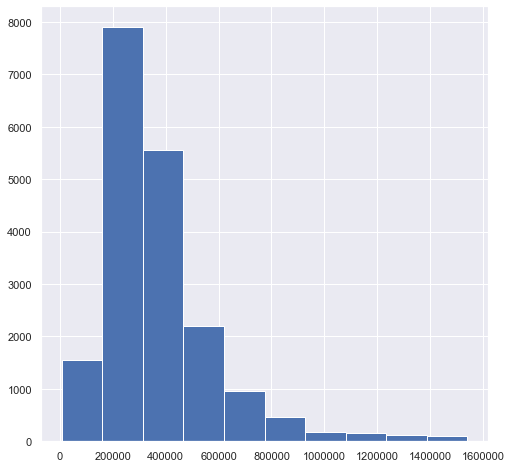

In [274]:
df['Price'].hist()

In [275]:
from scipy.stats import boxcox
for i in list(df.columns):
    df[i], lmbda = boxcox(df[i]+1,lmbda=None)

In [276]:
df.shape

(19173, 48)

In [15]:
#df

# Log transformation 

In [278]:
df_before_log

,HomeType,City,Price,TaxAssessedValue,DaysOnZillow,PageViewCount,FavoriteCount,Bedrooms,Bathrooms,Stories,...,AnnualPayroll,Households,FemalePopulation,MalePopulation,IncomePerHousehold,PersonsPerHousehold,AverageHouseValue,FemaleMedianAge,MaleMedianAge,MedianAge
0,1,51,201900,176500,9,929,37,3,3.0,2,...,3375916000,23871,36237,40119,39674.339031,3.197858,138650.0,29.300000,28.850000,29.050000
1,5,51,110000,88800,38,2865,49,3,2.0,0,...,3375916000,23871,36237,40119,39674.339031,3.197858,138650.0,29.300000,28.850000,29.050000
2,5,51,195000,157900,1,252,17,3,2.0,1,...,3375916000,23871,36237,40119,39674.339031,3.197858,138650.0,29.300000,28.850000,29.050000
3,6,51,239900,227800,34,1227,88,3,3.0,2,...,3375916000,23871,36237,40119,39674.339031,3.197858,138650.0,29.300000,28.850000,29.050000
4,5,51,210000,147000,53,1127,29,3,2.0,1,...,3375916000,23871,36237,40119,39674.339031,3.197858,138650.0,29.300000,28.850000,29.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19168,5,15,89900,78970,456,588,25,4,2.0,1,...,2738847000,69559,91845,82058,40763.167254,2.424670,127150.0,36.216667,32.516667,34.433333
19169,5,15,134990,0,396,441,24,3,2.0,1,...,2738847000,69559,91845,82058,40763.167254,2.424670,127150.0,36.216667,32.516667,34.433333
19170,5,15,114400,98820,21,1260,75,3,2.0,1,...,2738847000,69559,91845,82058,40763.167254,2.424670,127150.0,36.216667,32.516667,34.433333
19171,5,15,89900,59210,95,594,15,4,2.0,1,...,2738847000,69559,91845,82058,40763.167254,2.424670,127150.0,36.216667,32.516667,34.433333


In [279]:
df_before_log_columns = ['HomeType','City','Price','TaxAssessedValue','DaysOnZillow','PageViewCount','FavoriteCount','Bedrooms',
                  'Bathrooms','Stories','LivingArea','LotSize','Basement','Appliances',
                  'Cooling','Heating','Flooring','ExteriorFeatures','RoofType'
                 ,'YearBuilt','PrimarySchoolDistance','PrimarySchoolRating','MiddleSchoolDistance','MiddleSchoolRating','HighSchoolDistance',
                 'HighSchoolRating','BusinessMailboxes','ResidentialMailboxes','NumberofBusinesses','NumberofEmployees','Population2010',
                  'CurrentPopulation','AmericanIndianPopulation','AsianPopulation','BlackPopulation','HawaiianPopulation','HispanicPopulation',
                        'WhitePopulation','AnnualPayroll','Households','FemalePopulation','MalePopulation',
                        'IncomePerHousehold','PersonsPerHousehold','AverageHouseValue',
                        'MaleMedianAge','MedianAge']

In [280]:
#Log Transformation
def process_num(d, col):
    #d.drop(d[d[col]<=0].index, inplace=True)
    d[col+'_log'] =  np.log1p(d[col])
    return d

In [281]:
num_df = df_before_log[df_before_log_columns]
num_df.info()
num_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19173 entries, 0 to 19172
Data columns (total 47 columns):
HomeType                    19173 non-null int64
City                        19173 non-null int64
Price                       19173 non-null int64
TaxAssessedValue            19173 non-null int64
DaysOnZillow                19173 non-null int64
PageViewCount               19173 non-null int64
FavoriteCount               19173 non-null int64
Bedrooms                    19173 non-null int64
Bathrooms                   19173 non-null float64
Stories                     19173 non-null int64
LivingArea                  19173 non-null int64
LotSize                     19173 non-null int64
Basement                    19173 non-null int64
Appliances                  19173 non-null int64
Cooling                     19173 non-null int64
Heating                     19173 non-null int64
Flooring                    19173 non-null int64
ExteriorFeatures            19173 non-null int64
RoofTyp

,HomeType,City,Price,TaxAssessedValue,DaysOnZillow,PageViewCount,FavoriteCount,Bedrooms,Bathrooms,Stories,...,WhitePopulation,AnnualPayroll,Households,FemalePopulation,MalePopulation,IncomePerHousehold,PersonsPerHousehold,AverageHouseValue,MaleMedianAge,MedianAge
0,1,51,201900,176500,9,929,37,3,3.0,2,...,28910,3375916000,23871,36237,40119,39674.339031,3.197858,138650.0,28.850000,29.050000
1,5,51,110000,88800,38,2865,49,3,2.0,0,...,28910,3375916000,23871,36237,40119,39674.339031,3.197858,138650.0,28.850000,29.050000
2,5,51,195000,157900,1,252,17,3,2.0,1,...,28910,3375916000,23871,36237,40119,39674.339031,3.197858,138650.0,28.850000,29.050000
3,6,51,239900,227800,34,1227,88,3,3.0,2,...,28910,3375916000,23871,36237,40119,39674.339031,3.197858,138650.0,28.850000,29.050000
4,5,51,210000,147000,53,1127,29,3,2.0,1,...,28910,3375916000,23871,36237,40119,39674.339031,3.197858,138650.0,28.850000,29.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19168,5,15,89900,78970,456,588,25,4,2.0,1,...,80858,2738847000,69559,91845,82058,40763.167254,2.424670,127150.0,32.516667,34.433333
19169,5,15,134990,0,396,441,24,3,2.0,1,...,80858,2738847000,69559,91845,82058,40763.167254,2.424670,127150.0,32.516667,34.433333
19170,5,15,114400,98820,21,1260,75,3,2.0,1,...,80858,2738847000,69559,91845,82058,40763.167254,2.424670,127150.0,32.516667,34.433333
19171,5,15,89900,59210,95,594,15,4,2.0,1,...,80858,2738847000,69559,91845,82058,40763.167254,2.424670,127150.0,32.516667,34.433333


In [282]:
for s in df_before_log_columns:
    num_df = process_num(num_df, s)

In [283]:
num_df_log = num_df.drop(df_before_log_columns, axis=1)

In [284]:
num_df_log

,HomeType_log,City_log,Price_log,TaxAssessedValue_log,DaysOnZillow_log,PageViewCount_log,FavoriteCount_log,Bedrooms_log,Bathrooms_log,Stories_log,...,WhitePopulation_log,AnnualPayroll_log,Households_log,FemalePopulation_log,MalePopulation_log,IncomePerHousehold_log,PersonsPerHousehold_log,AverageHouseValue_log,MaleMedianAge_log,MedianAge_log
0,0.693147,3.951244,12.215533,12.081082,2.302585,6.835185,3.637586,1.386294,1.386294,1.098612,...,10.271977,21.939933,10.080462,10.497864,10.599630,10.588485,1.434575,11.839715,3.396185,3.402863
1,1.791759,3.951244,11.608245,11.394153,3.663562,7.960673,3.912023,1.386294,1.098612,0.000000,...,10.271977,21.939933,10.080462,10.497864,10.599630,10.588485,1.434575,11.839715,3.396185,3.402863
2,1.791759,3.951244,12.180760,11.969724,0.693147,5.533389,2.890372,1.386294,1.098612,0.693147,...,10.271977,21.939933,10.080462,10.497864,10.599630,10.588485,1.434575,11.839715,3.396185,3.402863
3,1.945910,3.951244,12.387982,12.336228,3.555348,7.113142,4.488636,1.386294,1.386294,1.098612,...,10.271977,21.939933,10.080462,10.497864,10.599630,10.588485,1.434575,11.839715,3.396185,3.402863
4,1.791759,3.951244,12.254868,11.898195,3.988984,7.028201,3.401197,1.386294,1.098612,0.693147,...,10.271977,21.939933,10.080462,10.497864,10.599630,10.588485,1.434575,11.839715,3.396185,3.402863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19168,1.791759,2.772589,11.406464,11.276836,6.124683,6.378426,3.258097,1.609438,1.098612,0.693147,...,11.300462,21.730803,11.149945,11.427869,11.315194,10.615559,1.231005,11.753131,3.512043,3.567653
19169,1.791759,2.772589,11.812963,0.000000,5.983936,6.091310,3.218876,1.386294,1.098612,0.693147,...,11.300462,21.730803,11.149945,11.427869,11.315194,10.615559,1.231005,11.753131,3.512043,3.567653
19170,1.791759,2.772589,11.647465,11.501065,3.091042,7.139660,4.330733,1.386294,1.098612,0.693147,...,11.300462,21.730803,11.149945,11.427869,11.315194,10.615559,1.231005,11.753131,3.512043,3.567653
19171,1.791759,2.772589,11.406464,10.988863,4.564348,6.388561,2.772589,1.609438,1.098612,0.693147,...,11.300462,21.730803,11.149945,11.427869,11.315194,10.615559,1.231005,11.753131,3.512043,3.567653


In [6]:
#num_df_log.info()

# Metrics

In the beggining, we considered five regression metrics for model selection. They are MAE, MSE, RMSE, MAPE and MPE

In [286]:
def metrics(pred, truth):
    print("MAE: %.2f" % np.mean(np.abs(pred- truth))) #MAE
    print("MSE: %.2f" % np.mean((pred- truth) ** 2))   #MSE
    print("RMSE: %.2f" % np.sqrt(np.mean((pred - truth) ** 2))) #RMSE
    print("MAPE: %.2f" % (np.mean(np.abs((pred -truth) / truth)) * 100)) #MAPE
    print("MPE: %.2f" % (np.mean((pred - truth) /truth)* 100))  #MPE

MPE used for proxy on bias. The bias alone won’t be enough to evaluate our forecast precision.

After data exploration and data preprocessing, we already removed outliers we defined. According to the paper (Georgios.D), MAE,MAPE (MAPE is considered as the weighted version of MAE the optimal constant predictions for MAPE it turns out to be the weighted median of the target value) can penalize huge errors that not as that badly as MSE does. Thus, they are not that sensitive to outliers as mean square error. In conclusin, MAE provides a protection against outliers whereas RMSE and MSE provides the assurance to get an unbiased forecast.If using MAE as a metric results in a high bias, we might want to use RMSE (Nicolas. V). If the dataset contains many outliers, resulting in a skewed forecast, we might want to use MAE. In this case, we do not have outliers anymore and also we prefer to care about model accuracy. Therefore, we prefer to use RMSE and MSE. 

It is also hard to realize if our model is good or not by looking at the absolute values of MSE or RMSE. We want to measure how much our model is better than the constant baseline.

The coefficient of determination, or R², is the main metric we use to evaluate a model and it is closely related to MSE, but has the advantage of being scale-free — it doesn’t matter if the output values are very large or very small, the R² is always going to be between -∞ and 1.In conclusion, R² is the ratio between how good our model is vs how good is the naive mean model.

Therefore, Our main regresison metric for model selection will be R^2. We also will check model's MSE and RMSE.

In [287]:
from sklearn.metrics import r2_score
def metrics_new(pred, truth):
    #print("MAE: %.2f" % np.mean(np.abs(pred- truth))) #MAE
    print("MSE: %.2f" % np.mean((pred- truth) ** 2))   #MSE
    print("RMSE: %.2f" % np.sqrt(np.mean((pred - truth) ** 2))) #RMSE
    #print("MAPE: %.2f" % (np.mean(np.abs((pred -truth) / truth)) * 100)) #MAPE
    #print("MPE: %.2f" % (np.mean((pred - truth) /truth)* 100))  #MPE
    print("R^2: %.3f" % (r2_score(truth, pred))) #R^2

# Spliting Data into Training and Testing dataset

In [288]:
Y = num_df_log['Price_log']
X = num_df_log.drop(['Price_log'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2020)

# PART TWO-exploratory data analysis and test hypotheses

### Dataset before transformation:num_df

### 1. general introduction 

In [289]:
num_df.describe()

,HomeType,City,Price,TaxAssessedValue,DaysOnZillow,PageViewCount,FavoriteCount,Bedrooms,Bathrooms,Stories,...,WhitePopulation_log,AnnualPayroll_log,Households_log,FemalePopulation_log,MalePopulation_log,IncomePerHousehold_log,PersonsPerHousehold_log,AverageHouseValue_log,MaleMedianAge_log,MedianAge_log
count,19173.000000,19173.000000,1.917300e+04,1.917300e+04,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,...,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000
mean,4.809889,33.134825,3.684249e+05,1.822540e+05,353.773379,647.109007,26.519376,3.726282,3.150642,1.705993,...,10.934784,20.912056,10.382553,10.737048,10.690106,11.110147,1.320942,12.211503,3.569531,3.595412
std,1.072921,21.188028,2.153710e+05,1.969438e+05,1119.483445,768.950134,37.043053,1.191666,1.280748,0.985438,...,1.101604,1.658224,1.163525,1.134069,1.135943,0.617433,0.095212,0.297935,0.066101,0.066458
min,0.000000,0.000000,7.500000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,13.987783,0.000000,0.000000,0.000000,0.000000,0.000000,11.512935,3.364994,3.391147
25%,5.000000,15.000000,2.300000e+05,0.000000e+00,26.000000,137.000000,4.000000,3.000000,2.000000,1.000000,...,10.322527,19.685965,9.899580,10.332930,10.273084,11.044859,1.291918,11.998286,3.529077,3.552487
50%,5.000000,36.000000,3.159900e+05,1.504000e+05,77.000000,410.000000,14.000000,4.000000,3.000000,2.000000,...,11.005660,20.762303,10.336924,10.668211,10.653865,11.127336,1.337547,12.238061,3.573282,3.597312
75%,5.000000,50.000000,4.430250e+05,2.777100e+05,165.000000,884.000000,35.000000,4.000000,4.000000,2.000000,...,11.647343,21.787815,11.002616,11.349747,11.297428,11.254569,1.373716,12.403639,3.602777,3.632687
max,6.000000,71.000000,1.540000e+06,5.050440e+06,14536.000000,14877.000000,571.000000,14.000000,11.000000,34.000000,...,12.885387,24.758774,12.860736,13.030011,13.004442,11.580399,1.435085,12.773305,3.983413,3.988984


### 2. Missing Value:NO 

### After the data processing, we dealt with all the missing values, so there are no more missing values in the dataset.

In [290]:
mv=[]
for i in num_df.columns:
    mv.append(num_df[i].isnull().any())   

In [291]:
pd.DataFrame({'Feature':num_df.columns,
              'Missing value':mv
             })

,Feature,Missing value
0,HomeType,False
1,City,False
2,Price,False
3,TaxAssessedValue,False
4,DaysOnZillow,False
...,...,...
89,IncomePerHousehold_log,False
90,PersonsPerHousehold_log,False
91,AverageHouseValue_log,False
92,MaleMedianAge_log,False


## 3.Outliers 

### 3.1 scatter diagram
we will first use diagram to show whether features include outliers. For some of the features are categorical features before, so we choose some of the original numerical features to find the outliers.

In [228]:
col=[]
for i in num_df.columns:
    col.append(i) 

In [1]:
#for i in range(1,48):
#    #yi = np.sin(2*np.pi*t)
#    #y2 = np.sin(2*np.pi*t)
#    plt.subplot(10,5,i)
#    b=num_df[col[i-1]]
#    #plt.figure(figsize=(1,1))
#    plt.scatter(range(0,len(num_df)),b)
#    #plt.subplots_adjust(wspace=0, hspace=0) 
#    #fig.subplots_adjust(wspace=0.5,hspace=0.5)
#    plt.subplots_adjust(left=4, bottom=4, right=5, top=5,
#                    wspace=1, hspace=1)

In [2]:
#k=5
#fig=plt.figure(figsize=(k,k))
#ax1=fig.add_subplot(1,2,1)
#plt.figure(figsize=(3,3))
#plt.scatter(range(0,len(num_df['Bedrooms'])),num_df['Bedrooms'])
#plt.subplots_adjust(wspace=0, hspace=0)


In [3]:
#for i in num_df.columns:
#    plt.figure(figsize=(3,3))
#    plt.scatter(range(0,len(num_df[i])),num_df[i])
#    plt.subplots_adjust(wspace=0, hspace=0)
#    plt.title(i)


### According to the scatter plot, we find most of the features contain outliers. 

### 3.2 Delete Outliers
We keep value of features within three standard deviations, because that's essentially 99% of the range.

In [232]:
numdf=num_df
for i in numdf.columns:
    feature = np.array(numdf[i])
    mean = np.mean(feature,axis=0)
    sd = np.std(feature, axis=0)
num_df=numdf

## 4. Skewed distribution 

### 4.1 Graph
Observe the skewness distribution of the features through the graph.

In [4]:
#for k in ['Appliances','Price','TaxAssessedValue','DaysOnZillow',
#          'PageViewCount', 'FavoriteCount','Bedrooms', 'Bathrooms', 'Stories',
#          'LivingArea', 'LotSize', 'Basement', 'YearBuilt',
#       'PrimarySchoolDistance', 'PrimarySchoolRating', 'MiddleSchoolDistance',
#       'MiddleSchoolRating', 'HighSchoolDistance', 'HighSchoolRating',
#       'BusinessMailboxes', 'ResidentialMailboxes', 'NumberofBusinesses',
#       'NumberofEmployees', 'Population2010', 'CurrentPopulation',
#       'AmericanIndianPopulation', 'AsianPopulation', 'BlackPopulation',
#       'HawaiianPopulation', 'HispanicPopulation', 'WhitePopulation',
#       'AnnualPayroll', 'Households', 'FemalePopulation', 'MalePopulation',
#       'IncomePerHousehold', 'PersonsPerHousehold', 'AverageHouseValue',
#       'MaleMedianAge', 'MedianAge']:
#    df1=numdf
#    
#    fig = plt.figure()
#    plt.figure(figsize=(5,5))
#    sns.distplot(df1[k] , fit=norm) #画出数据的分布图
#    (mu, sigma) = norm.fit(df1[k])  #求mu，sigma
#    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best') #画图例
#    plt.ylabel('Frequency')
#    plt.title(k)

#    fig = plt.figure()
#    plt.figure(figsize=(5,5))
#    res = stats.probplot(df1[k], plot=plt) #画拟合曲线
#    plt.show()

### According to the graph of distribution and QQ plot, we find most of the features  follow  skewed distribution.

### 4.2  Transfer skewed distribution to normal
As the transformation we do in the data processing part, we took the log of the value of the features, so we can modify the distribution of the features to normal distribution.

In [5]:
#for k in ['Appliances_log','Price_log','TaxAssessedValue_log','DaysOnZillow_log',
#          'PageViewCount_log', 'FavoriteCount_log','Bedrooms_log', 'Bathrooms_log', 'Stories_log',
#          'LivingArea_log', 'LotSize_log', 'Basement_log','YearBuilt_log', 'PrimarySchoolDistance_log', 'PrimarySchoolRating_log',
#       'MiddleSchoolDistance_log', 'MiddleSchoolRating_log',
#       'HighSchoolDistance_log', 'HighSchoolRating_log',
#       'BusinessMailboxes_log', 'ResidentialMailboxes_log',
#       'NumberofBusinesses_log', 'NumberofEmployees_log', 'Population2010_log',
#       'CurrentPopulation_log', 'AmericanIndianPopulation_log',
#       'AsianPopulation_log', 'BlackPopulation_log', 'HawaiianPopulation_log',
#       'HispanicPopulation_log', 'WhitePopulation_log', 'AnnualPayroll_log',
#       'Households_log', 'FemalePopulation_log', 'MalePopulation_log',
#       'IncomePerHousehold_log', 'PersonsPerHousehold_log',
#       'AverageHouseValue_log', 'MaleMedianAge_log', 'MedianAge_log']:
#    df1=num_df_log
#    
#    fig = plt.figure()
#    plt.figure(figsize=(5,5))
#    sns.distplot(df1[k] , fit=norm) #画出数据的分布图
#    (mu, sigma) = norm.fit(df1[k])  #求mu，sigma
#    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best') #画图例
#    plt.ylabel('Frequency')
#    plt.title(k)

#    fig = plt.figure()
#    plt.figure(figsize=(5,5))
#    res = stats.probplot(df1[k], plot=plt) #画拟合曲线
#    plt.show()

## 5.Test Hypotheses

### 5.1 Hypothese
+ 1.H0:The numbers of bedrooms/ bathrooms would be important features to affect house price
+ 2.H0:The numbers of living areas would be important features to affect house price.
+ 3.H0:The Tax Assessed Value would be important features to affect house price.
+ 4.H0:The distance of middle school and the rate of middle school would be important features to affect house price.
+ 5.H0:The distance of primary school and the rate of primary school would be important features to affect house price.
+ 6.H0:The distance of high school and the rate of high school would be important features to affect house price.
+ 7.H0:There is no strong correlation between the variables.

### 5.2 H0(1-4)
We use XGboost Feature Importance to solve the first four hypotheses.

[15:46:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

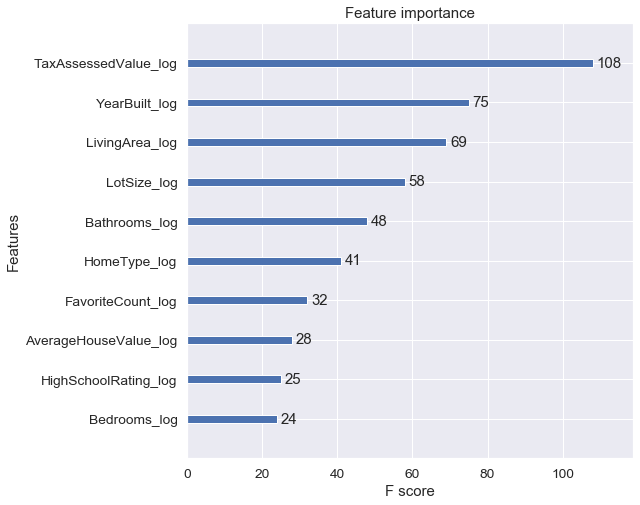

In [297]:
model = XGBRegressor()
model.fit(x_train, y_train)
plot_importance(model, max_num_features=10)
plt.show()

Acccording to the result, 
+ We can not refuse the first hypothese,
+ we can not refuse the second hypothese,
+ we can not refuse the third hypothese,
+ we refuse the forth hypothese,
+ we refuse the fifth hypothese,
+ we can not refuse the sixth hypothese.

### 5.3 H0(5)
We do the Correlation Analysis to test the the fifth hypotheses.

In [10]:
#Correlation Analysis
#df=num_df_log
#corrmat = df.corr()
#f, ax = plt.subplots(figsize=(20, 16))
#sns.heatmap(corrmat, vmax=.8, square=True)
#sns.heatmap(corrmat, fmt="d", square=True, linewidths=.5)

#### Accord to the Correlation analysis,we find Features('BusinessMailboxes', 'ResidentialMailboxes', 'NumberofBusinesses','NumberofEmployees', 'Population2010', 'CurrentPopulation','AmericanIndianPopulation', 'AsianPopulation', 'BlackPopulation','HawaiianPopulation', 'HispanicPopulation', 'WhitePopulation','AnnualPayroll', 'Households', 'FemalePopulation', 'MalePopulation') have strong correlation.

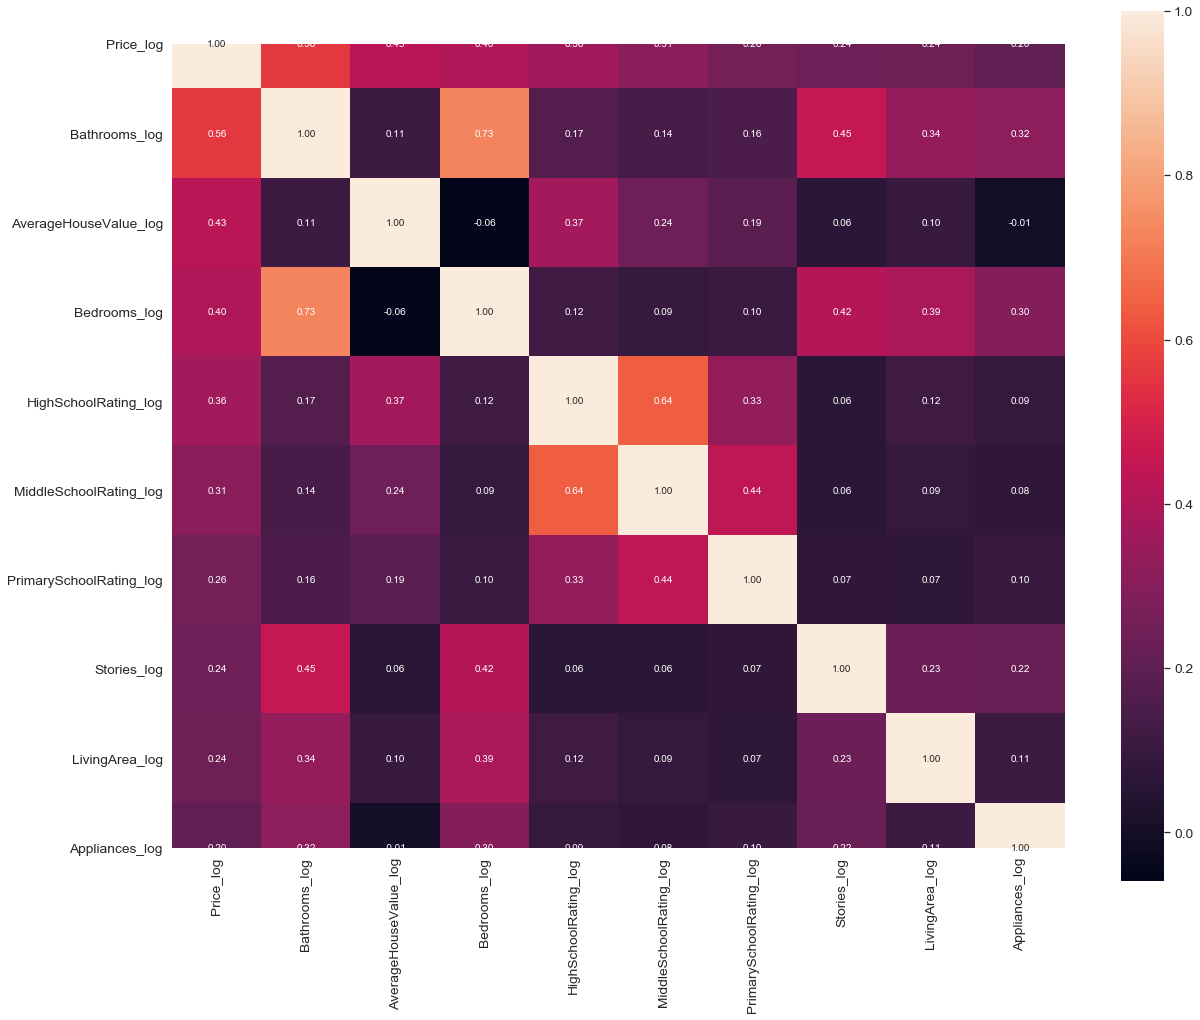

In [317]:
k = 10
cols = corrmat.nlargest(k, 'Price_log')['Price_log'].index
#df[["HighSchoolRating",'MiddleSchoolRating','PrimarySchoolRating']] = df[["HighSchoolRating",'MiddleSchoolRating','PrimarySchoolRating']].astype("float")
cm = df[cols].corr()
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(20, 16))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Dataset after transformation:num_df_log

In [292]:
num_df_log.describe()

,HomeType_log,City_log,Price_log,TaxAssessedValue_log,DaysOnZillow_log,PageViewCount_log,FavoriteCount_log,Bedrooms_log,Bathrooms_log,Stories_log,...,WhitePopulation_log,AnnualPayroll_log,Households_log,FemalePopulation_log,MalePopulation_log,IncomePerHousehold_log,PersonsPerHousehold_log,AverageHouseValue_log,MaleMedianAge_log,MedianAge_log
count,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,...,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000,19173.000000
mean,1.730991,3.152491,12.671136,8.751206,4.199001,5.777254,2.534748,1.511634,1.366232,0.944764,...,10.934784,20.912056,10.382553,10.737048,10.690106,11.110147,1.320942,12.211503,3.569531,3.595412
std,0.273359,1.086894,0.548613,5.496046,1.739694,1.367594,1.360974,0.318901,0.365976,0.325295,...,1.101604,1.658224,1.163525,1.134069,1.135943,0.617433,0.095212,0.297935,0.066101,0.066458
min,0.000000,0.000000,8.922792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,13.987783,0.000000,0.000000,0.000000,0.000000,0.000000,11.512935,3.364994,3.391147
25%,1.791759,2.772589,12.345839,0.000000,3.295837,4.927254,1.609438,1.386294,1.098612,0.693147,...,10.322527,19.685965,9.899580,10.332930,10.273084,11.044859,1.291918,11.998286,3.529077,3.552487
50%,1.791759,3.610918,12.663469,11.921060,4.356709,6.018593,2.708050,1.609438,1.386294,1.098612,...,11.005660,20.762303,10.336924,10.668211,10.653865,11.127336,1.337547,12.238061,3.573282,3.597312
75%,1.791759,3.931826,13.001384,12.534336,5.111988,6.785588,3.583519,1.609438,1.609438,1.098612,...,11.647343,21.787815,11.002616,11.349747,11.297428,11.254569,1.373716,12.403639,3.602777,3.632687
max,1.945910,4.276666,14.247294,15.434986,9.584452,9.607639,6.349139,2.708050,2.484907,3.555348,...,12.885387,24.758774,12.860736,13.030011,13.004442,11.580399,1.435085,12.773305,3.983413,3.988984


# PART THREE

# Lasso before tunning

In [57]:
from sklearn.linear_model import LassoCV

lasso_before_tune = LassoCV(random_state=42)
lasso_before_tune.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=42, selection='cyclic',
        tol=0.0001, verbose=False)

In [58]:
pred_train = lasso_before_tune.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

,predict_train_price_log,truth_train_price_log,predict_train_price,truth_train_price
10503,12.560945,12.238675,285200.0,206628.0
18253,12.589637,12.574185,293501.0,289001.0
4741,13.092976,13.945662,485520.0,1139001.0
8406,12.715466,12.312687,332856.0,222501.0
234,12.814673,13.060277,367571.0,469901.0
11125,12.659639,12.610173,314783.0,299591.0
2813,12.955898,13.060277,423326.0,469901.0
698,12.969534,13.199141,429138.0,539901.0
10623,13.104674,13.384729,491233.0,650001.0
16239,12.513348,12.577636,271943.0,290000.0


In [59]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 24338199207.20
RMSE: 156007.05
R^2: 0.473


In [60]:
pred = lasso_before_tune.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

,predict_price_log,truth_price_log,predict_price,truth_price
1356,12.779611,12.672950,354907.0,319001.0
17892,12.124018,12.100718,184244.0,180001.0
12198,12.778795,12.736704,354617.0,340001.0
9774,12.673518,12.594734,319182.0,295001.0
18511,12.250711,11.938200,209130.0,153001.0
18437,12.347855,12.341438,230465.0,228991.0
8661,13.216737,13.038440,549485.0,459751.0
14024,13.088215,12.985170,483214.0,435901.0
12975,12.704250,12.514296,329144.0,272201.0
4385,12.427848,12.257041,249658.0,210458.0


In [61]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 23786964926.03
RMSE: 154230.23
R^2: 0.492


# Lasso Tunning 

In [63]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
alphas = np.logspace(-4, -0.5, 30)


tuned_parameters = [{'alpha': alphas}]
n_folds = 10

grid_lasso = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True, scoring = 'r2')
grid_lasso.fit(x_train, y_train)
print(grid_lasso.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-0...
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'alpha': 0.0001}


In [64]:
best_model_lasso = Lasso().set_params(**grid_lasso.best_params_)
best_model_lasso.fit(x_train,y_train)
pred_train = best_model_lasso.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

,predict_train_price_log,truth_train_price_log,predict_train_price,truth_train_price
10503,12.558036,12.238675,284371.0,206628.0
18253,12.580563,12.574185,290850.0,289001.0
4741,13.100440,13.945662,489158.0,1139001.0
8406,12.718950,12.312687,334018.0,222501.0
234,12.818273,13.060277,368897.0,469901.0
11125,12.641743,12.610173,309200.0,299591.0
2813,12.944877,13.060277,418686.0,469901.0
698,12.984651,13.199141,435675.0,539901.0
10623,13.106468,13.384729,492115.0,650001.0
16239,12.527788,12.577636,275898.0,290000.0


In [65]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 24297057076.22
RMSE: 155875.13
R^2: 0.474


In [66]:
pred = best_model_lasso.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

,predict_price_log,truth_price_log,predict_price,truth_price
1356,12.776502,12.672950,353805.0,319001.0
17892,12.131508,12.100718,185630.0,180001.0
12198,12.784891,12.736704,356786.0,340001.0
9774,12.673216,12.594734,319086.0,295001.0
18511,12.253911,11.938200,209800.0,153001.0
18437,12.350842,12.341438,231155.0,228991.0
8661,13.199654,13.038440,540178.0,459751.0
14024,13.081594,12.985170,480025.0,435901.0
12975,12.703772,12.514296,328987.0,272201.0
4385,12.434745,12.257041,251386.0,210458.0


In [67]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 23742069014.06
RMSE: 154084.62
R^2: 0.493


# Tiny Conclusion for Lasso Linear Regression

The R^2 of Lasso Linear Regression is 0.493. We used one hyperparameter which is alpha (penalty). The default Lasso model and tuned Lass model have similar R^2. It makes sense that tuned lasso regression do not have higher "accuracy", because the hyperparameter (alpha) is used to penlizing (avoid overfitting). Its purpose is increase bias and decrease variance. 

# Random Forest before tunning

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf_before_model= RandomForestRegressor(random_state=42)
rf_before_model.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [70]:
pred_train = rf_before_model.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

,predict_train_price_log,truth_train_price_log,predict_train_price,truth_train_price
10503,12.263242,12.238675,211767.0,206628.0
18253,12.586665,12.574185,292630.0,289001.0
4741,13.879479,13.945662,1066059.0,1139001.0
8406,12.291581,12.312687,217854.0,222501.0
234,13.063931,13.060277,471621.0,469901.0
11125,12.602915,12.610173,297424.0,299591.0
2813,13.010668,13.060277,447158.0,469901.0
698,13.205200,13.199141,543182.0,539901.0
10623,13.391559,13.384729,654455.0,650001.0
16239,12.613209,12.577636,300502.0,290000.0


In [71]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1528574786.11
RMSE: 39096.99
R^2: 0.967


In [72]:
pred = rf_before_model.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

,predict_price_log,truth_price_log,predict_price,truth_price
1356,12.684504,12.672950,322708.0,319001.0
17892,11.480072,12.100718,96768.0,180001.0
12198,12.701751,12.736704,328322.0,340001.0
9774,12.494716,12.594734,266923.0,295001.0
18511,12.020730,11.938200,166164.0,153001.0
18437,12.350983,12.341438,231187.0,228991.0
8661,13.173865,13.038440,526425.0,459751.0
14024,12.943309,12.985170,418030.0,435901.0
12975,12.545072,12.514296,280709.0,272201.0
4385,12.252470,12.257041,209498.0,210458.0


In [73]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 9153757256.71
RMSE: 95675.27
R^2: 0.805


# Random Forest_RandomSearch 

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor(random_state=42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 8,10,20,50]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
param_grid= {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(model,param_grid, n_iter = 1000, cv =5,random_state=42, n_jobs = -1, scoring = 'r2')
# Fit the random search model
rf_random.fit(x_train, y_train)

# examine the best model
print(rf_random.best_params_)
print(rf_random.best_estimator_)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

{'n_estimators': 177, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=177, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


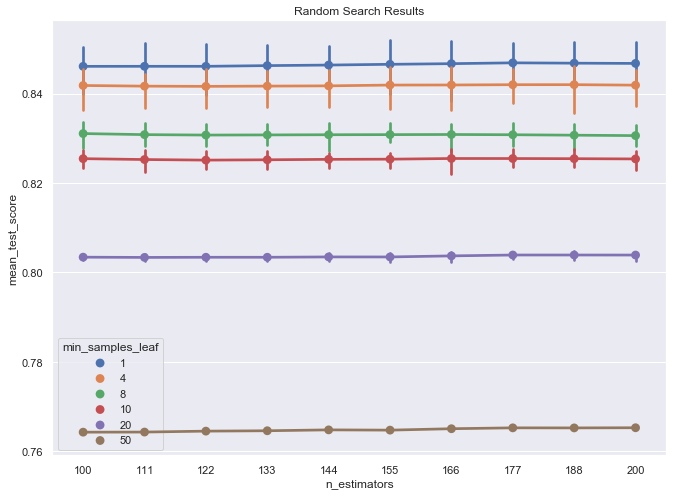

In [76]:
import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Random Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(rf_random.cv_results_, 'n_estimators', 'min_samples_leaf')


In [77]:
best_rf_model = RandomForestRegressor(random_state=42).set_params(**rf_random.best_params_)
best_rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=177, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [78]:
pred_train = best_rf_model.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

,predict_train_price_log,truth_train_price_log,predict_train_price,truth_train_price
10503,12.259371,12.238675,210949.0,206628.0
18253,12.588797,12.574185,293255.0,289001.0
4741,13.880571,13.945662,1067223.0,1139001.0
8406,12.288503,12.312687,217185.0,222501.0
234,13.065233,13.060277,472235.0,469901.0
11125,12.604005,12.610173,297749.0,299591.0
2813,13.007100,13.060277,445566.0,469901.0
698,13.210090,13.199141,545845.0,539901.0
10623,13.408097,13.384729,665369.0,650001.0
16239,12.606796,12.577636,298581.0,290000.0


In [79]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1523391655.95
RMSE: 39030.65
R^2: 0.967


In [80]:
pred = best_rf_model.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

,predict_price_log,truth_price_log,predict_price,truth_price
1356,12.680442,12.672950,321400.0,319001.0
17892,11.465357,12.100718,95355.0,180001.0
12198,12.704762,12.736704,329312.0,340001.0
9774,12.494212,12.594734,266789.0,295001.0
18511,12.058968,11.938200,172641.0,153001.0
18437,12.352421,12.341438,231520.0,228991.0
8661,13.156100,13.038440,517156.0,459751.0
14024,12.933460,12.985170,413933.0,435901.0
12975,12.529389,12.514296,276340.0,272201.0
4385,12.256808,12.257041,210409.0,210458.0


In [213]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 15874918336.07
RMSE: 125995.71
R^2: 0.661


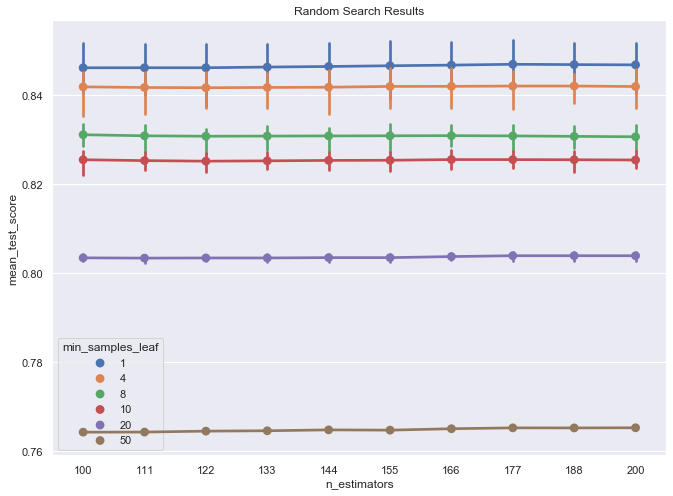

In [82]:
# plot the results

import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Random Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(rf_random.cv_results_, 'n_estimators', 'min_samples_leaf')


# Tiny Conclusion for Random Forest

The R^2 of default Random Forest Model is 0.805. We used four hyperparameters to tune the Random Forest model.They are number of estimators, max despth, min sample split and min sample leaf. The R^2 of Random Forest Model is 0.661. The tuned Random forest got really bad R^2 in test set but has good R^2 in tran set which is 0.967. It means Tuned Random Forest overfitting. Our assumption is that we set too large of n_estimators too force model to be more complicated. Random Forest tuning really wastes time (half or one day for Random Forest Tuning), so we do not have enough time to revise hyperparameters and tune model again. In the future, we will try revise the range of n_estimators and we have confidence that Random Forest will have much better result in test set.

# XGBoost_GridSearch

In [84]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

model = XGBRegressor(objective ='reg:squarederror',random_state=42)
model.fit(x_train, y_train)

# Create the random grid
param_grid= {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15] }
print(param_grid)

grid = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15]}


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=42, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 

{'learning_rate': 0.15, 'max_depth': 8}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


In [85]:
best_model_XGBoost = XGBRegressor(random_state=42).set_params(**grid.best_params_)
best_model_XGBoost.fit(x_train,y_train)

[04:21:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [86]:
pred_train = best_model_XGBoost.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

,predict_train_price_log,truth_train_price_log,predict_train_price,truth_train_price
10503,12.250715,12.238675,209131.0,206628.0
18253,12.607268,12.574185,298722.0,289001.0
4741,13.897685,13.945662,1085645.0,1139001.0
8406,12.286574,12.312687,216766.0,222501.0
234,13.054332,13.060277,467115.0,469901.0
11125,12.608298,12.610173,299030.0,299591.0
2813,13.006720,13.060277,445396.0,469901.0
698,13.190767,13.199141,535399.0,539901.0
10623,13.437185,13.384729,685007.0,650001.0
16239,12.637964,12.577636,308034.0,290000.0


In [87]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1361838390.75
RMSE: 36903.09
R^2: 0.971


In [88]:
pred = best_model_XGBoost.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

,predict_price_log,truth_price_log,predict_price,truth_price
1356,12.710608,12.672950,331243.0,319001.0
17892,11.431957,12.100718,92222.0,180001.0
12198,12.656980,12.736704,313947.0,340001.0
9774,12.546282,12.594734,281048.0,295001.0
18511,12.022827,11.938200,166513.0,153001.0
18437,12.372535,12.341438,236224.0,228991.0
8661,13.263519,13.038440,575802.0,459751.0
14024,13.024722,12.985170,453487.0,435901.0
12975,12.479917,12.514296,263002.0,272201.0
4385,12.179930,12.257041,194839.0,210458.0


In [89]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 8167857347.30
RMSE: 90376.20
R^2: 0.826


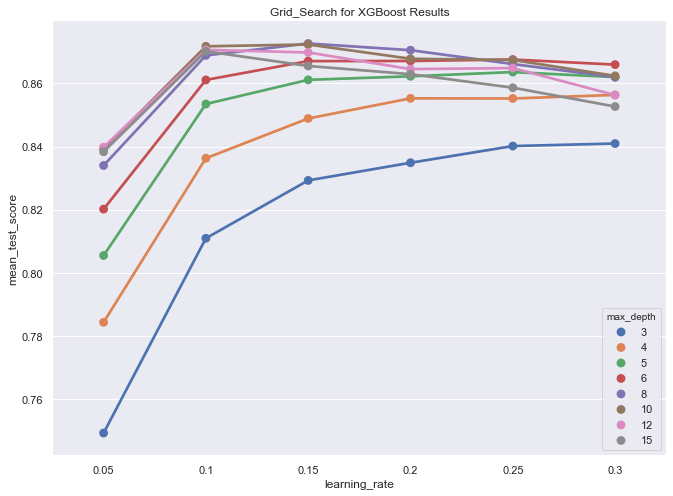

In [90]:
# plot the results

import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Grid_Search for XGBoost Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid.cv_results_, 'learning_rate', 'max_depth')

# XGBoost before Tunning

In [93]:
from xgboost import XGBRegressor
model_XGB = XGBRegressor(objective ='reg:squarederror', random_state=42)
model_XGB.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [94]:
pred_train = model_XGB.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

,predict_train_price_log,truth_train_price_log,predict_train_price,truth_train_price
10503,12.226754,12.238675,204179.0,206628.0
18253,12.604381,12.574185,297860.0,289001.0
4741,13.730320,13.945662,918337.0,1139001.0
8406,12.357557,12.312687,232712.0,222501.0
234,13.070049,13.060277,474515.0,469901.0
11125,12.569075,12.610173,287528.0,299591.0
2813,12.940280,13.060277,416766.0,469901.0
698,13.224698,13.199141,553877.0,539901.0
10623,13.523803,13.384729,746986.0,650001.0
16239,12.712918,12.577636,332009.0,290000.0


In [95]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 9581065388.97
RMSE: 97882.92
R^2: 0.793


In [96]:
pred = model_XGB.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

,predict_price_log,truth_price_log,predict_price,truth_price
1356,12.639056,12.672950,308370.0,319001.0
17892,11.471642,12.100718,95956.0,180001.0
12198,12.651381,12.736704,312194.0,340001.0
9774,12.518630,12.594734,273383.0,295001.0
18511,12.224936,11.938200,203808.0,153001.0
18437,12.469892,12.341438,260378.0,228991.0
8661,13.346697,13.038440,625744.0,459751.0
14024,12.955319,12.985170,423081.0,435901.0
12975,12.652393,12.514296,312510.0,272201.0
4385,12.172954,12.257041,193485.0,210458.0


In [97]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 11276221962.81
RMSE: 106189.56
R^2: 0.759


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'XGBRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

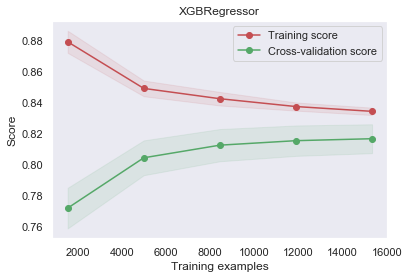

In [98]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
estimator=XGBRegressor(objective ='reg:squarederror')
plt.figure()
plt.title('XGBRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(estimator, X, Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Tiny Conclusion for XGBoost

The R^2 of default XGBoost model in test set is 0.759. We tuned two hyperparameters (Learning rate and max depth). After tuned, the R^2 of the optimal XGBoost model ('learning_rate': 0.15, 'max_depth': 8) in test set is 0.826. In conclusion, tuned hyperparameters help XGBoost model to have higher "accuracy". According to the XGBoost introduction online, we need to tune learning rate and number of iteration together to get great result (higher R^2 or lower MSE/RMSE). However, number of iterations tunning cost too much time, we did not try it. If we have more time, we will try more useful and important hyperparameters. 

# LGBM_before_tunning

In [99]:
from lightgbm.sklearn import LGBMRegressor

lgbm_model_before_tune= LGBMRegressor(random_state=42)
lgbm_model_before_tune.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [100]:
pred_train = lgbm_model_before_tune.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

,predict_train_price_log,truth_train_price_log,predict_train_price,truth_train_price
10503,12.216293,12.238675,202055.0,206628.0
18253,12.563306,12.574185,285874.0,289001.0
4741,13.924917,13.945662,1115616.0,1139001.0
8406,12.314943,12.312687,223004.0,222501.0
234,13.054483,13.060277,467186.0,469901.0
11125,12.615701,12.610173,301252.0,299591.0
2813,12.951652,13.060277,421532.0,469901.0
698,13.230585,13.199141,557147.0,539901.0
10623,13.472658,13.384729,709743.0,650001.0
16239,12.638364,12.577636,308157.0,290000.0


In [101]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 4875456830.55
RMSE: 69824.47
R^2: 0.894


In [102]:
pred = lgbm_model_before_tune.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)


,predict_price_log,truth_price_log,predict_price,truth_price
1356,12.697397,12.672950,326896.0,319001.0
17892,11.301721,12.100718,80961.0,180001.0
12198,12.652824,12.736704,312645.0,340001.0
9774,12.535093,12.594734,277921.0,295001.0
18511,12.125326,11.938200,184485.0,153001.0
18437,12.403332,12.341438,243612.0,228991.0
8661,13.281429,13.038440,586207.0,459751.0
14024,13.011335,12.985170,447457.0,435901.0
12975,12.581651,12.514296,291167.0,272201.0
4385,12.182793,12.257041,195398.0,210458.0


In [103]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 8262161622.80
RMSE: 90896.43
R^2: 0.824


# LGBM_GridSearch

In [105]:
from lightgbm.sklearn import LGBMRegressor

model = LGBMRegressor()
model.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [106]:

from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

model = LGBMRegressor(random_state=42)
model.fit(x_train, y_train)

# Create the random grid
param_grid= {"num_leaves"    : [20,30,60,70,100,150,200] ,
    "min_data_in_leaf"        : [10,20,50,100,150,200,300]  }
print(param_grid)

grid_LGBM = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')
grid_LGBM.fit(x_train, y_train)
print(grid_LGBM.best_params_)
print(grid_LGBM.best_estimator_)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

{'num_leaves': [20, 30, 60, 70, 100, 150, 200], 'min_data_in_leaf': [10, 20, 50, 100, 150, 200, 300]}


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=42,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'min_data_in_leaf': [10, 20, 50, 100, 150, 200, 300],
                         'num_leaves': [20, 30, 60, 70, 100, 150, 200]},
             pre_dispatch='2*n

{'min_data_in_leaf': 20, 'num_leaves': 200}
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=200,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


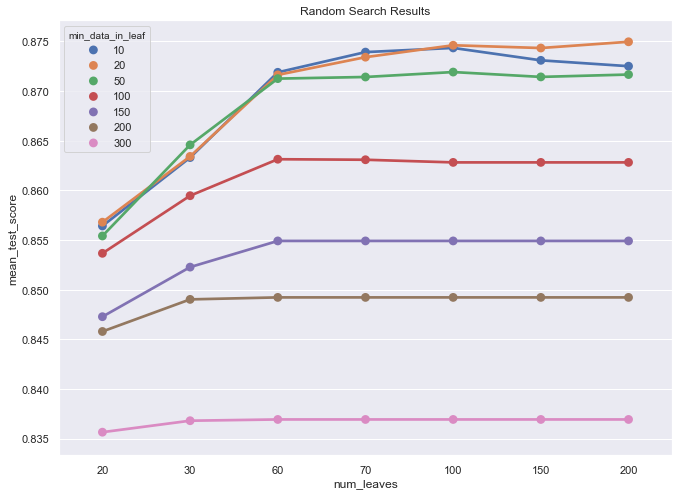

In [107]:
import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Random Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid_LGBM.cv_results_, 'num_leaves', 'min_data_in_leaf')


In [108]:
best_model_Lgbm = LGBMRegressor(random_state=42).set_params(**grid_LGBM.best_params_)
best_model_Lgbm.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=200,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [109]:
pred_train =best_model_Lgbm.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

,predict_train_price_log,truth_train_price_log,predict_train_price,truth_train_price
10503,12.256304,12.238675,210303.0,206628.0
18253,12.560228,12.574185,284995.0,289001.0
4741,13.989030,13.945662,1189484.0,1139001.0
8406,12.317927,12.312687,223670.0,222501.0
234,13.057503,13.060277,468599.0,469901.0
11125,12.616866,12.610173,301603.0,299591.0
2813,12.990851,13.060277,438384.0,469901.0
698,13.220418,13.199141,551512.0,539901.0
10623,13.426770,13.384729,677910.0,650001.0
16239,12.633948,12.577636,306799.0,290000.0


In [110]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1035184184.50
RMSE: 32174.28
R^2: 0.978


In [111]:
pred = best_model_Lgbm.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

,predict_price_log,truth_price_log,predict_price,truth_price
1356,12.705462,12.672950,329543.0,319001.0
17892,11.502408,12.100718,98954.0,180001.0
12198,12.641831,12.736704,309227.0,340001.0
9774,12.489500,12.594734,265534.0,295001.0
18511,12.146452,11.938200,188424.0,153001.0
18437,12.354230,12.341438,231939.0,228991.0
8661,13.174958,13.038440,527001.0,459751.0
14024,12.921175,12.985170,408879.0,435901.0
12975,12.525407,12.514296,275242.0,272201.0
4385,12.161620,12.257041,191304.0,210458.0


In [112]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 7837783637.59
RMSE: 88531.26
R^2: 0.833


# Tiny Conclusion for LGBM

The R^2 of default lgbm model in test set is 0.822. We tuned two hyperparameters (min data in leaf and number of leaves). After tuned, the R^2 of the optimal LGBM model ('min_data_in_leaf': 20, 'num_leaves': 200) in test set is 0.833. In conclusion, tuned hyperparameters help LGBM model to have higher R^2. 

According to the grid search graph and LGBM introduction online, Setting min_data_in_leaf to smaller value will lead growing deeper a tree, which means will help model to have higher "accuracy" and also will be easier to be overfitting. Online paper mentioned that larger number of leaves means higher "accuracy" (higher R^2 or lower RMSE/MSE), but our grid search showed that it also has possbility that "accuracy" decreased when number of leaves increased. Therefore, the better way is to consider more hyperparameters (If we have enough time, we will try more). 

An interesting story:
In the beginning, we found that R^2 of tuned LGBM even smaller than R^2 of the default LGBM. After we checked LGBM Introfuction online, we found that the default value of num_leaves is 31. But our first tuning range of num_leaves is (5,30). Our max value in the range of num_leaves still smaller than default value. After revised the range of num_leaves, we got better results.  

# Conclusion

According to our result the top 10 most important of prediction of house price in Georgia state are TaxAssessedValue, YearBuilt, LivingArea, LotSize, Bathrooms, HomeType, FavoriteCount, AverageHouseValue, HighSchoolRating, PageViewCount. Obviously, when people decide to buy the house, they take into account not only the value of the home itself, but also the property tax. Buyers pay much attention to the length of time, because it is closely related to the quality of the house. It is also obvious that living area directly determines the price of a house. For the convenience of daily life, buyers will consider not only the areas of the house where they are active for long periods of time, but also the amount of bathroom. One of the interesting aspects of the results is that buyers tend to prefer homes near high schools, perhaps because of the high security or high traffic around the school.


So, if people want to sale their house at a good price in Georgia state, their house should have low Tax, the age of the house should not be long, for the house situation, living area should around 2000, lost size should be around 20000 and bathrooms should be more than two, they should be single family and  if they near good high school will be a plus. Besides, they should show good description and introduction on the website, which may attract more people, for pageviewcount feature are also important.

At the beginning of the project, we decided to use six metrics (RMSE, MAE, MSE, MAPE, MPE and R^2) to evaluate our model results, but as we continued to train the model, we found that some of these metrics were not applicable to our model training and evaluation. Therefore, we finally chose MSE, RMSE and R^2 for evaluation and training.

# Reference

1. Georgios. D. "How to select the Right Evaluation Metric for Machine Learning Models: Part 1 Regression Metrics". Retrieved from https://medium.com/@george.drakos62/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0
2. Nicolas. V. "Forecast KPI: RMSE, MAE, MAPE & Bias". Retrieved from https://medium.com/analytics-vidhya/forecast-kpi-rmse-mae-mape-bias-cdc5703d242d
3. Lever, J., Krzywinski, M., & Altman, N. (2017, June 29). Principal component analysis. Retrieved April 9, 2020, from https://www.nature.com/articles/nmeth.4346 
4.
5.
